Este conjunto de datos contiene diez variables base como edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad en un año.

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

In [2]:
df = load_diabetes( return_X_y=False, as_frame=True)
df.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


Obteber el árbol de decisión óptimo para predecir la respuesta de interes a partir de los datos de los pacientes.

In [3]:

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3, random_state=1)
print(X_train)


          age       sex       bmi        bp        s1        s2        s3  \
332  0.030811 -0.044642  0.104809  0.076958 -0.011201 -0.011335 -0.058127   
307  0.067136  0.050680 -0.030996  0.004658  0.024574  0.035638 -0.028674   
328 -0.038207 -0.044642  0.067085 -0.060757 -0.029088 -0.023234 -0.010266   
275 -0.005515  0.050680 -0.011595  0.011544 -0.022208 -0.015406 -0.021311   
414  0.081666  0.050680  0.006728 -0.004523  0.109883  0.117056 -0.032356   
..        ...       ...       ...       ...       ...       ...       ...   
255  0.001751 -0.044642 -0.065486 -0.005671 -0.007073 -0.019476  0.041277   
72   0.063504  0.050680 -0.004050 -0.012556  0.103003  0.048790  0.056003   
396 -0.085430  0.050680 -0.030996 -0.022885 -0.063487 -0.054236  0.019187   
235  0.067136  0.050680 -0.014828  0.058596 -0.059359 -0.034508 -0.061809   
37  -0.009147 -0.044642  0.011039 -0.057314 -0.024960 -0.042963  0.030232   

           s4        s5        s6  
332  0.034309  0.057104  0.036201  
307

In [4]:
reg = DecisionTreeRegressor( max_depth=4)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [5]:
error =metrics.mean_squared_error(y_test,y_pred)
print(error)

4407.3187514576175


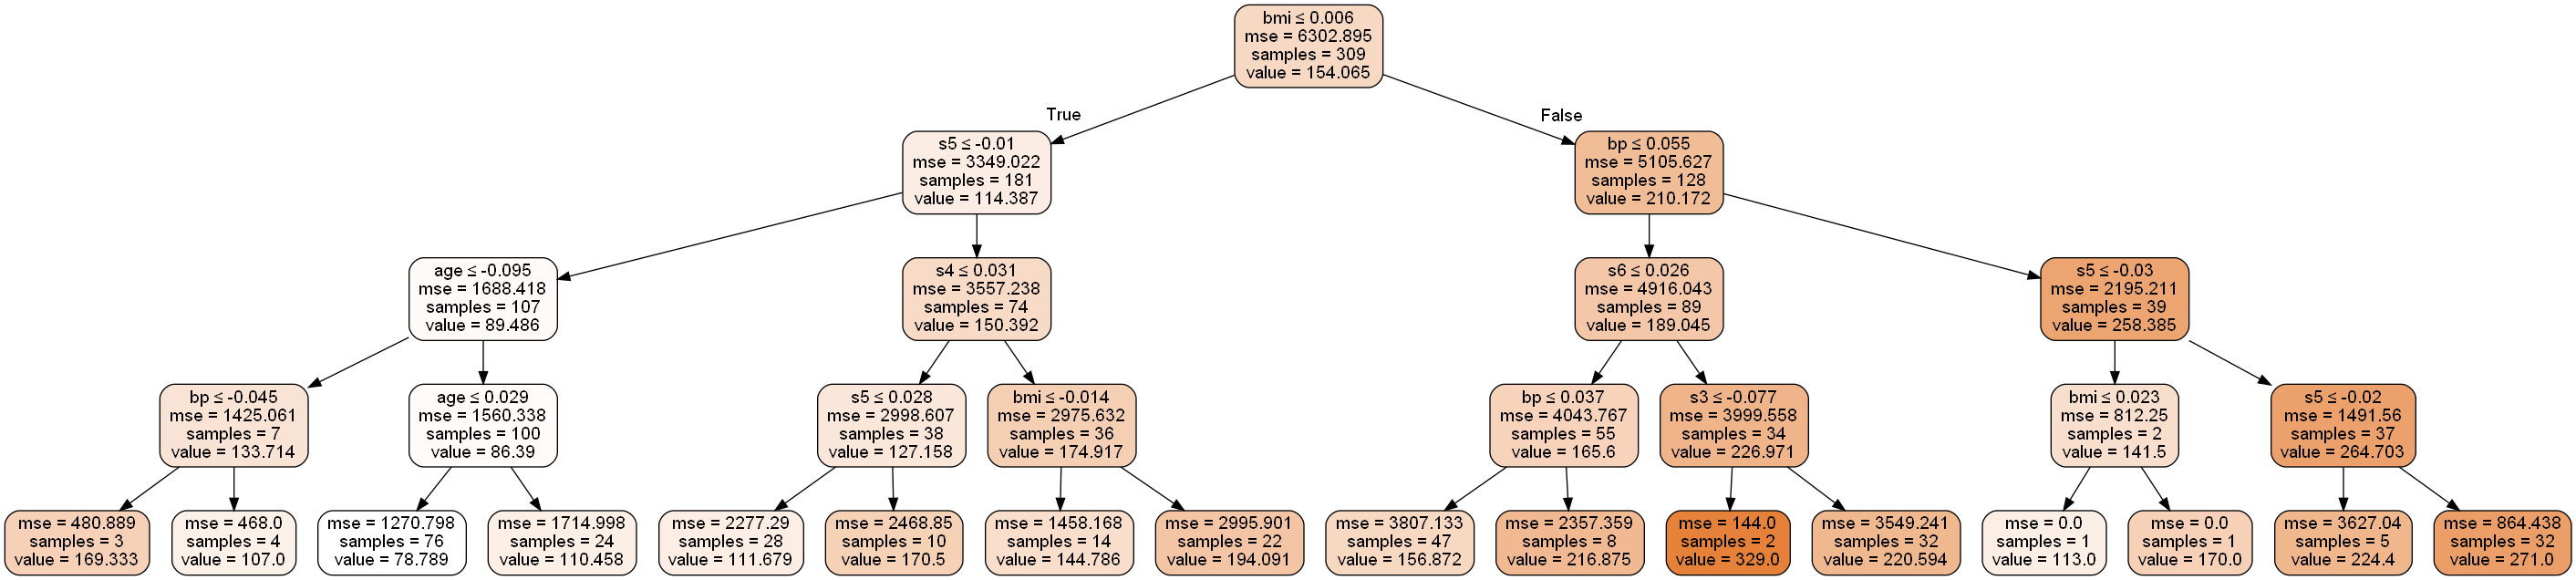

In [6]:

data_columns = df.data.columns
dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Los atributos más importantes que se consideraron en el árbol de regresión son:
- Indice de masa corporal (bmi)
- Edad (age)
- Presión arterial promedio (bp)
- Medisiones de suero sanguíneo (s3,s4,s5,s6)
## Se tuvo un mejor desempeño cuando:
- edad<=0.029
- bmi <=0.006
- s5 <=-0.01
## Se tuvo un peor desempeño cuando:
- bmi > 0.006
- bp <= 0.055
- s6 > 0.026
- s3 <= -0.077

#### El árbol no nos sirve en este caso debido a que los valores del dataset fueron normalizados previamente en base a cierta desviación estandar. Por lo tanto, solo podemos observar cuales son los atributos con mayor incidencia en el problema que se plantea.